# Dataset

In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Normalize

In [4]:
X_train = X_train.reshape((-1,28,28,1)).astype('float32') / 255.0
X_test = X_test.reshape((-1,28,28,1)).astype('float32') / 255.0

# Model

In [32]:
import tensorflow as tf
model = keras.Sequential()

model.add(tf.keras.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32 , (3,3) , activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32 ,(3,3) , activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10,activation="softmax"))


In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,922 (1.29 MB)

 Trainable params: 338,922 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
hist = model.fit(X_train , y_train , epochs=10 , batch_size=256 , validation_data=(X_test , y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6603 - loss: 1.0007 - val_accuracy: 0.9763 - val_loss: 0.0768
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9587 - loss: 0.1441 - val_accuracy: 0.9845 - val_loss: 0.0499
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9732 - loss: 0.0925 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9791 - loss: 0.0734 - val_accuracy: 0.9887 - val_loss: 0.0328
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9830 - loss: 0.0595 - val_accuracy: 0.9893 - val_loss: 0.0333
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.0518 - val_accuracy: 0.9878 - val_loss: 0.0345
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9865 - loss: 0.0456 - val_accuracy: 0.9926 - val_loss: 0.0240
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9893 - loss: 0.0373 - val_accuracy: 0

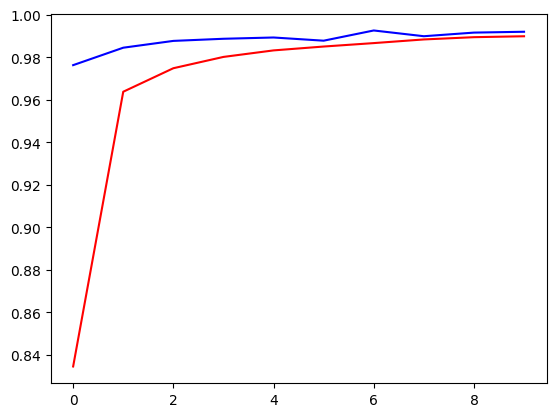

In [25]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"] , color="red")
plt.plot(hist.history["val_accuracy"] , color="blue")
plt.show()